In [1]:
#6) Write a Python program to:Train an AdaBoost Classifier on the Breast Cancer dataset

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

adaboost = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9590643274853801


In [2]:
#7)Write a Python program to Train a Gradient Boosting Regressor on the California Housing dataset

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared score:", r2)


Gradient Boosting Regressor R-squared score: 0.804992915650479


In [3]:
#8)Write a Python program to:Train an XGBoost Classifier on the Breast Cancer dataset

from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Learning Rate:", grid_search.best_params_)
print("Test Set Accuracy:", accuracy)


Best Learning Rate: {'learning_rate': 0.3}
Test Set Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:39:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00
CatBoost Classifier Accuracy: 0.9766081871345029


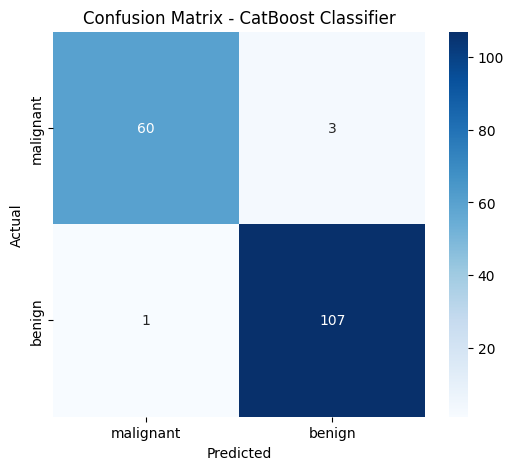

In [5]:
#9) Write a Python program to: Train a CatBoost Classifier and Plot the confusion matrix using seaborn

!pip install catboost

from sklearn.datasets import load_breast_cancer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    random_seed=42,
    verbose=0
)

catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()


Best Hyperparameters: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Accuracy: 0.9373333333333334
ROC-AUC: 0.9678606214417997

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1195
           1       0.85      0.84      0.84       305

    accuracy                           0.94      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.94      0.94      0.94      1500



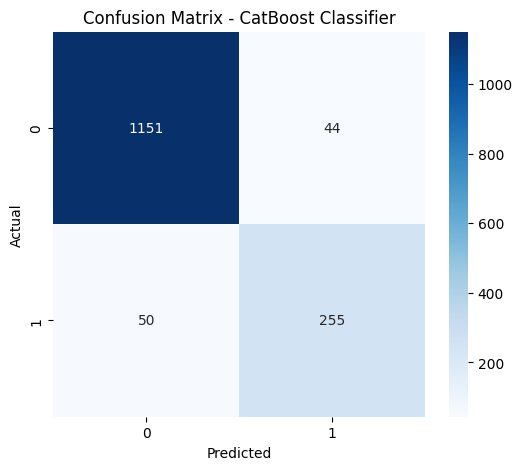

In [6]:
#10) You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier

# Step 1: Load dataset (example with synthetic data)
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=5000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    weights=[0.8, 0.2],
    random_state=42
)

X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

for col in ['feature_0', 'feature_1', 'feature_2']:
    X[col] = pd.qcut(X[col], 4, labels=False)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

cat_features = ['feature_0', 'feature_1', 'feature_2']

# Step 3: Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0,
    class_weights=[1, 4]
)

# Step 4: Hyperparameter tuning (example with GridSearchCV)
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X_train, y_train, cat_features=cat_features)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 5: Evaluate model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()
